## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

🔹 Summary Statistics (Numerical):
             Age        Salary
count   4.000000      5.000000
mean   32.500000  63000.000000
std     6.454972  12041.594579
min    25.000000  50000.000000
25%    28.750000  55000.000000
50%    32.500000  60000.000000
75%    36.250000  70000.000000
max    40.000000  80000.000000

🔹 Summary Statistics (Categorical):
        Gender
count        5
unique       2
top     Female
freq         3


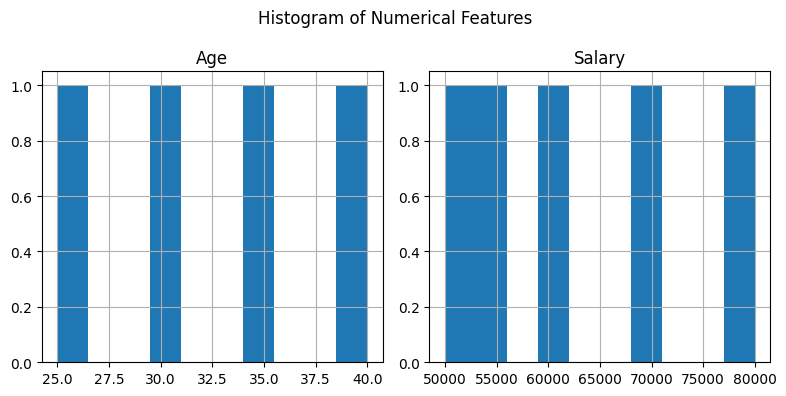

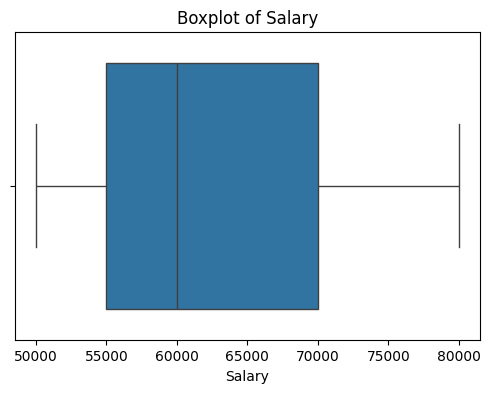

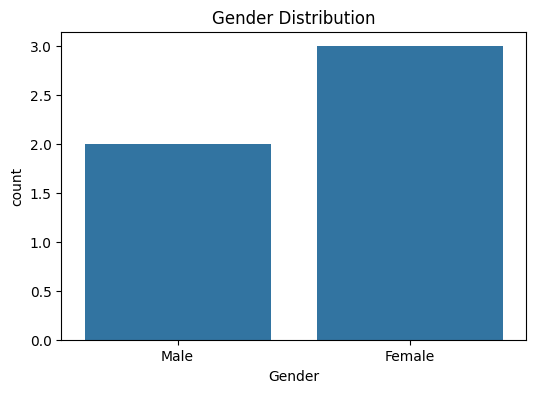


🔹 Missing Value Count per Column:
Age       2
Salary    1
Gender    1
dtype: int64


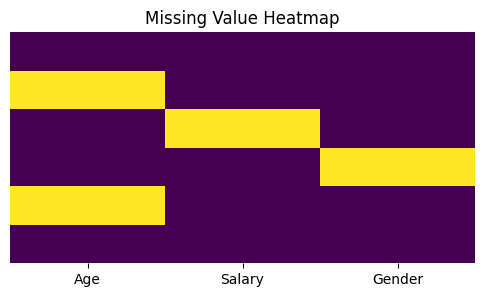

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Sample Dataset
# ----------------------------
data = {
    "Age": [25, np.nan, 35, 40, np.nan, 30],
    "Salary": [50000, 60000, np.nan, 70000, 80000, 55000],
    "Gender": ["Male", "Female", "Female", np.nan, "Male", "Female"]
}

df = pd.DataFrame(data)

# ----------------------------
# Task 1: Summary Statistics
# ----------------------------
print("🔹 Summary Statistics (Numerical):")
print(df.describe())

print("\n🔹 Summary Statistics (Categorical):")
print(df.describe(include=['object']))

# ----------------------------
# Task 2: Visualize Data Distribution
# ----------------------------

# Histograms for numerical columns
df.hist(figsize=(8, 4), bins=10)
plt.suptitle("Histogram of Numerical Features")
plt.tight_layout()
plt.show()

# Boxplot for Salary
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Salary"])
plt.title("Boxplot of Salary")
plt.show()

# Count plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# ----------------------------
# Task 3: Checking for Null Values
# ----------------------------
print("\n🔹 Missing Value Count per Column:")
print(df.isnull().sum())

# Optional: Heatmap of missing values
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()



## Handle Missing & Inconsistent Data Before Applying ML Models

In [6]:
# Task 4: Drop Missing Values





# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping



import pandas as pd
import numpy as np

# ----------------------------
# Sample Dataset
# ----------------------------
data = {
    "Age": [25, np.nan, 35, 40, 120, 30],      # 120 is an outlier
    "Salary": [50000, 60000, np.nan, 70000, 80000, 55000],
    "Gender": ["Male", "Female", "Female", np.nan, "Male", "Female"]
}

df = pd.DataFrame(data)
print("🔹 Original DataFrame:")
print(df)

# ----------------------------
# Task 4: Drop Missing Values
# ----------------------------
df_dropped = df.dropna()
print("\n🔹 After Dropping Rows with Missing Values:")
print(df_dropped)

# ----------------------------
# Task 5: Fill Missing Values
# ----------------------------

# Fill numerical columns with mean
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())

# Fill categorical columns with mode
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

print("\n🔹 After Filling Missing Values:")
print(df)

# ----------------------------
# Task 6: Handle Outliers with Capping (Winsorizing)
# ----------------------------

def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# Apply capping to Age and Salary
df["Age"] = cap_outliers(df["Age"])
df["Salary"] = cap_outliers(df["Salary"])

print("\n🔹 After Capping Outliers:")
print(df)




🔹 Original DataFrame:
     Age   Salary  Gender
0   25.0  50000.0    Male
1    NaN  60000.0  Female
2   35.0      NaN  Female
3   40.0  70000.0     NaN
4  120.0  80000.0    Male
5   30.0  55000.0  Female

🔹 After Dropping Rows with Missing Values:
     Age   Salary  Gender
0   25.0  50000.0    Male
4  120.0  80000.0    Male
5   30.0  55000.0  Female

🔹 After Filling Missing Values:
     Age   Salary  Gender
0   25.0  50000.0    Male
1   50.0  60000.0  Female
2   35.0  63000.0  Female
3   40.0  70000.0  Female
4  120.0  80000.0    Male
5   30.0  55000.0  Female

🔹 After Capping Outliers:
      Age   Salary  Gender
0   26.25  51250.0    Male
1   50.00  60000.0  Female
2   35.00  63000.0  Female
3   40.00  70000.0  Female
4  102.50  77500.0    Male
5   30.00  55000.0  Female


## Choose the Right Scaling Method

In [7]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling




import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler

# ----------------------------
# Sample Dataset
# ----------------------------
data = {
    "Age": [22, 25, 35, 45, 55, 65, 120],   # 120 is an outlier
    "Salary": [25000, 30000, 40000, 50000, 60000, 70000, 80000]
}

df = pd.DataFrame(data)
print("🔹 Original Data:")
print(df)

# ----------------------------
# Task 7: Min-Max Scaling
# ----------------------------
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print("\n🔹 Min-Max Scaled Data:")
print(df_minmax)

# ----------------------------
# Task 8: Robust Scaling
# ----------------------------
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
print("\n🔹 Robust Scaled Data:")
print(df_robust)

# ----------------------------
# Task 9: MaxAbs Scaling
# ----------------------------
maxabs_scaler = MaxAbsScaler()
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df), columns=df.columns)
print("\n🔹 MaxAbs Scaled Data:")
print(df_maxabs)

🔹 Original Data:
   Age  Salary
0   22   25000
1   25   30000
2   35   40000
3   45   50000
4   55   60000
5   65   70000
6  120   80000

🔹 Min-Max Scaled Data:
        Age    Salary
0  0.000000  0.000000
1  0.030612  0.090909
2  0.132653  0.272727
3  0.234694  0.454545
4  0.336735  0.636364
5  0.438776  0.818182
6  1.000000  1.000000

🔹 Robust Scaled Data:
        Age    Salary
0 -0.766667 -0.833333
1 -0.666667 -0.666667
2 -0.333333 -0.333333
3  0.000000  0.000000
4  0.333333  0.333333
5  0.666667  0.666667
6  2.500000  1.000000

🔹 MaxAbs Scaled Data:
        Age  Salary
0  0.183333  0.3125
1  0.208333  0.3750
2  0.291667  0.5000
3  0.375000  0.6250
4  0.458333  0.7500
5  0.541667  0.8750
6  1.000000  1.0000


## Keep Track of Data Transformations for Reproducibility

In [8]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters



import pandas as pd
import numpy as np
import logging
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# ----------------------------
# Setup Logger for Preprocessing
# ----------------------------
logging.basicConfig(
    filename='preprocessing.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def log_step(step_desc):
    print(step_desc)
    logging.info(step_desc)

# ----------------------------
# Sample Data
# ----------------------------
data = {
    "Age": [25, np.nan, 35, 40, 120, 30],
    "Salary": [50000, 60000, np.nan, 70000, 80000, 55000]
}

df = pd.DataFrame(data)
log_step("Loaded initial dataset.")

# ----------------------------
# Task 10: Log Data Preprocessing Steps
# ----------------------------

# Impute missing Age with mean
imputer_age = SimpleImputer(strategy="mean")
df["Age"] = imputer_age.fit_transform(df[["Age"]])
log_step("Filled missing values in 'Age' with mean.")

# Impute missing Salary with median
imputer_salary = SimpleImputer(strategy="median")
df["Salary"] = imputer_salary.fit_transform(df[["Salary"]])
log_step("Filled missing values in 'Salary' with median.")

# ----------------------------
# Task 11: Store Transformation Parameters
# ----------------------------

# Scale 'Age' using MinMaxScaler
scaler_age = MinMaxScaler()
df["Age_scaled"] = scaler_age.fit_transform(df[["Age"]])
log_step("Applied Min-Max scaling to 'Age'.")

# Save transformers for future reproducibility
joblib.dump(imputer_age, "imputer_age.joblib")
joblib.dump(imputer_salary, "imputer_salary.joblib")
joblib.dump(scaler_age, "scaler_age.joblib")
log_step("Saved imputer and scaler objects to disk.")

print("\nFinal DataFrame after preprocessing:")
print(df)


Loaded initial dataset.
Filled missing values in 'Age' with mean.
Filled missing values in 'Salary' with median.
Applied Min-Max scaling to 'Age'.
Saved imputer and scaler objects to disk.

Final DataFrame after preprocessing:
     Age   Salary  Age_scaled
0   25.0  50000.0    0.000000
1   50.0  60000.0    0.263158
2   35.0  60000.0    0.105263
3   40.0  70000.0    0.157895
4  120.0  80000.0    1.000000
5   30.0  55000.0    0.052632
